In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

In [2]:
#Loading Excel dataset
file='pokemon.xlsx'
data=pd.ExcelFile(file)
#print(data.sheet_names)

In [3]:
#Creating Pandas DataFrames
df=data.parse('Pokemon')
#print(df.head())
df2=data.parse('Evolution')
#print(df2.head())


#Creating normalised versions of the attribute columns
normalise_min=0
normalise_max=100

df[["Atk_norm","Def_norm","HP_norm","Spd_norm"]]= preprocessing.minmax_scale(df[["Attack","Defense","HP","Speed"]], feature_range=(normalise_min, normalise_max))



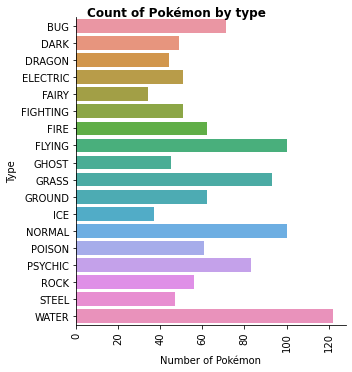

In [4]:
#Count plot of number of Pokémon in each type category
unique_type=sorted(df["Type"].unique())
p=sns.catplot(y='Type',data=df,kind="count",order=unique_type)
plt.xticks(rotation=90)
p.fig.suptitle("Count of Pokémon by type",y=1.001,fontweight="bold")
p.set(xlabel="Number of Pokémon")
p.fig.savefig('pokemon_count_by_type.png',transparent=True)

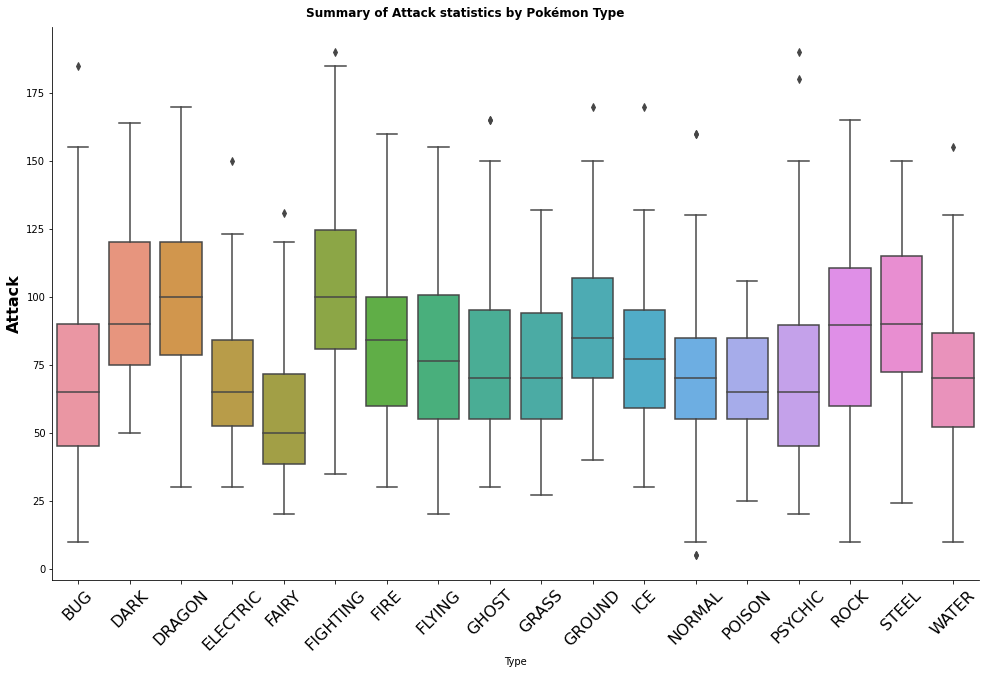

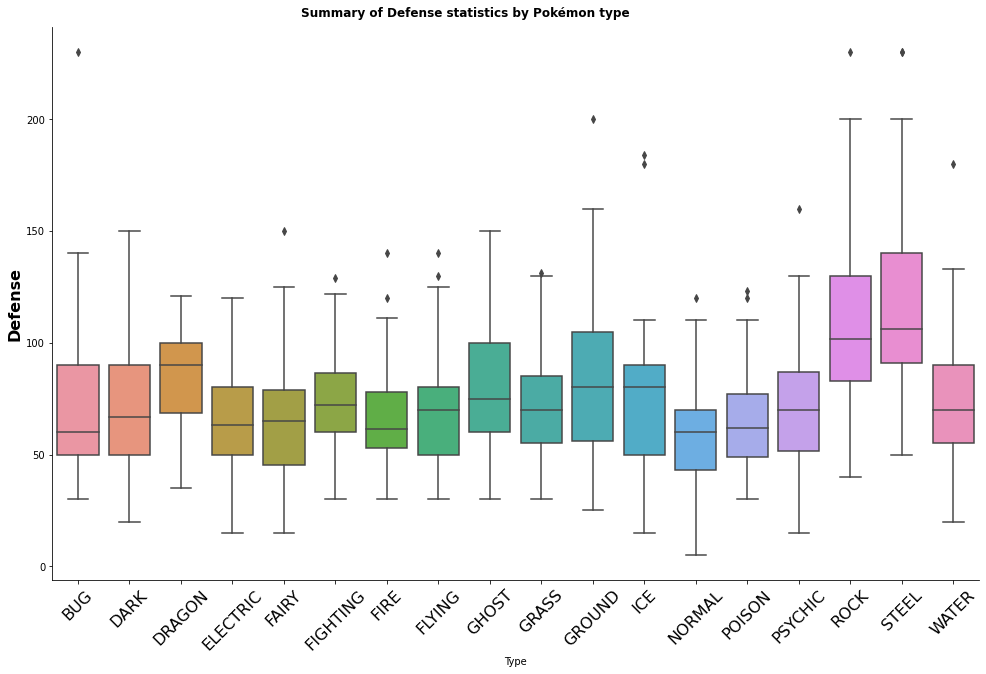

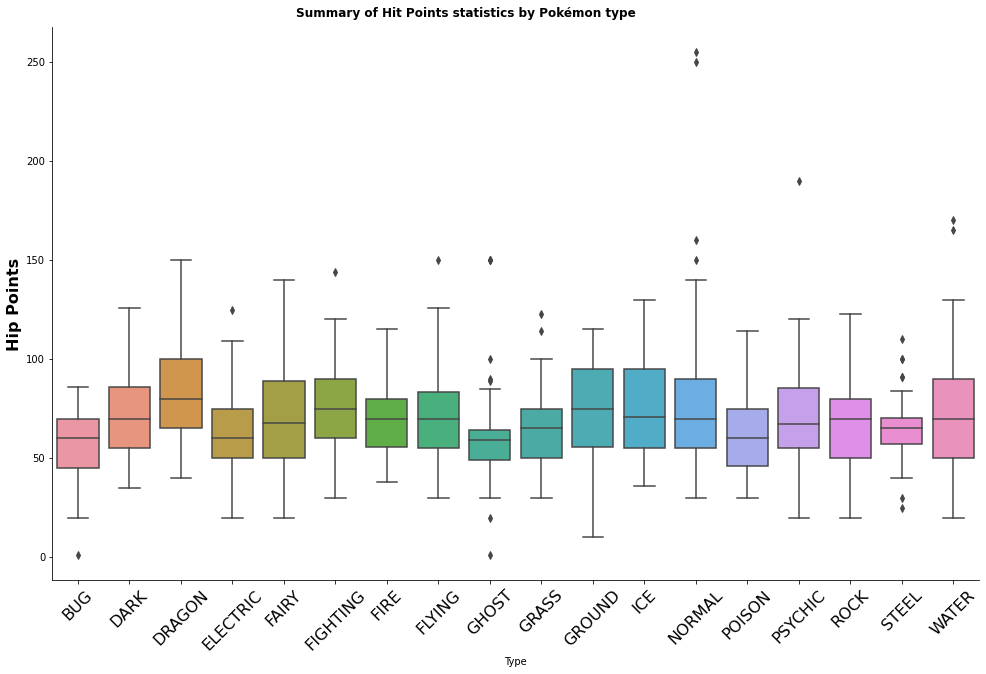

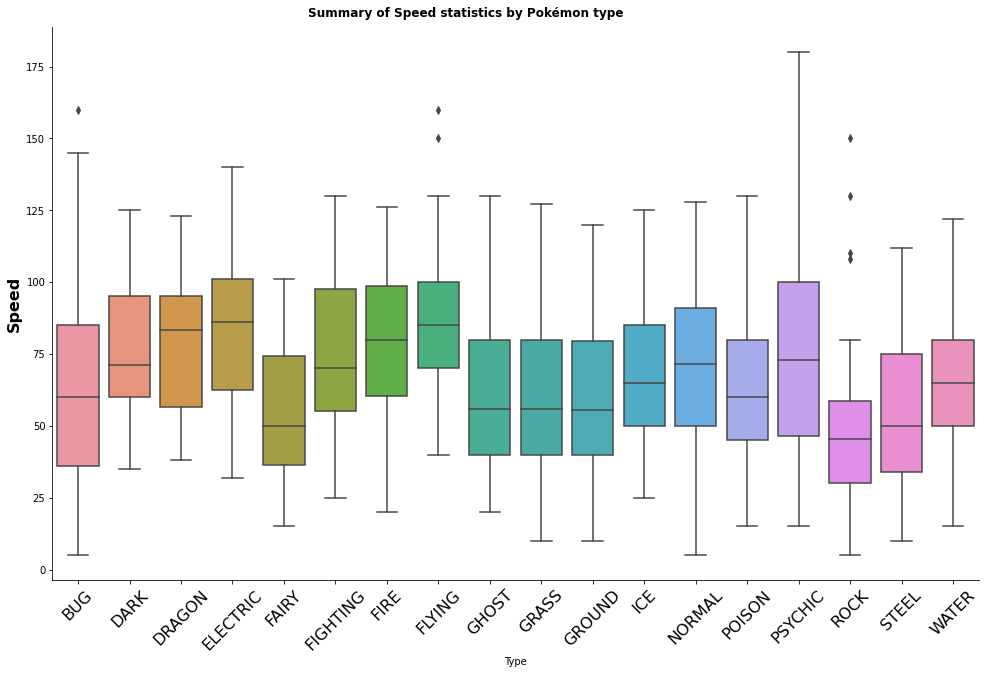

In [5]:
#Box plots of attributes by Pokémon Type
#Attack
p2=sns.catplot(x="Type",y="Attack",data=df,kind="box",order=unique_type)
plt.xticks(rotation=45,fontsize=16)
p2.fig.suptitle("Summary of Attack statistics by Pokémon Type",y=1.001,fontweight="bold")
p2.set(xlabel="Type")
plt.ylabel("Attack",fontsize=16,fontweight="bold")
p2.fig.set_size_inches([16,9])
p2.fig.savefig('pokemon_type_boxplot_atk.png',transparent=True)
#Defense
p3=sns.catplot(x="Type",y="Defense",data=df,kind="box",order=unique_type)
plt.xticks(rotation=45,fontsize=16)
p3.fig.suptitle("Summary of Defense statistics by Pokémon type",y=1.001,fontweight="bold")
p3.set(xlabel="Type")
plt.ylabel("Defense",fontsize=16,fontweight="bold")
p3.fig.set_size_inches([16,9])
p3.fig.savefig('pokemon_type_boxplot_def.png',transparent=True)
#Hit Points
p4=sns.catplot(x="Type",y="HP",data=df,kind="box",order=unique_type)
plt.xticks(rotation=45,fontsize=16)
p4.fig.suptitle("Summary of Hit Points statistics by Pokémon type",y=1.001,fontweight="bold")
p4.set(xlabel="Type")
plt.ylabel("Hip Points",fontsize=16,fontweight="bold")
p4.fig.set_size_inches([16,9])
p4.fig.savefig('pokemon_type_boxplot_hp.png',transparent=True)
#Speed
p5=sns.catplot(x="Type",y="Speed",data=df,kind="box",order=unique_type)
plt.xticks(rotation=45,fontsize=16)
p5.fig.suptitle("Summary of Speed statistics by Pokémon type",y=1.001,fontweight="bold")
p5.set(xlabel="Type")
plt.ylabel("Speed",fontsize=16,fontweight="bold")
p5.fig.set_size_inches([16,9])
p5.fig.savefig('pokemon_type_boxplot_spd.png',transparent=True)
plt.show()

In [6]:
#Creating the pokemon_evolution DataFrame with joins
dfu=df.drop_duplicates(subset="Name",keep="first",inplace=False)
sub_df=dfu[["#","Name","Type","HP","Speed","Attack","Defense"]]
sub_df_index=sub_df.set_index("#")
sub_df2=df2[["Evolving from","Evolving to"]]
pokemon_evolution=sub_df_index.merge(sub_df2,left_on="Name",right_on="Evolving from",how="inner")
pes=pokemon_evolution.merge(pokemon_evolution,left_on="Evolving to",right_on="Evolving from",suffixes=('_og','_evolved'))
pes2=pes.rename(columns={"Evolving from_evolved":"1st Evolution","Evolving to_evolved":"2nd Evolution"})
pes3=pes2.merge(sub_df_index,left_on="2nd Evolution",right_on="Name",how="inner",suffixes=('_2','_3'))
pes4=pes3.drop(columns=["Evolving from_og","Evolving to_og","Name_evolved","Name"])
final=pes4.rename(columns={"HP":"HP_final","Speed":"Speed_final","Attack":"Attack_final","Defense":"Defense_final","Type":"Type_final"})

#Adding new columns for attribute improvements
#Attack
final["1_atk"]=final["Attack_evolved"]-final["Attack_og"]
final["2_atk"]=final["Attack_final"]-final["Attack_evolved"]
final["tot_atk"]=final["1_atk"]+final["2_atk"]
#Defense
final["1_def"]=final["Defense_evolved"]-final["Defense_og"]
final["2_def"]=final["Defense_final"]-final["Defense_evolved"]
final["tot_def"]=final["1_def"]+final["2_def"]
#Hit Points
final["1_hp"]=final["HP_evolved"]-final["HP_og"]
final["2_hp"]=final["HP_final"]-final["HP_evolved"]
final["tot_hp"]=final["1_hp"]+final["2_hp"]
#Speed
final["1_spd"]=final["Speed_evolved"]-final["Speed_og"]
final["2_spd"]=final["Speed_final"]-final["Speed_evolved"]
final["tot_spd"]=final["1_spd"]+final["2_spd"]
#Overall improvement
final["1_all"]=final["1_hp"]+final["1_def"]+final["1_atk"]+final["1_spd"]
final["2_all"]=final["2_atk"]+final["2_def"]+final["2_hp"]+final["2_spd"]
final["all"]=final["tot_atk"]+final["tot_def"]+final["tot_hp"]+final["tot_spd"]
#Total Stats after evolutions
final["total_stats_og"]=final["Attack_og"]+final["Defense_og"]+final["HP_og"]+final["Speed_og"]
final["total_stats_evolved"]=final["Attack_evolved"]+final["Defense_evolved"]+final["HP_evolved"]+final["Speed_evolved"]
final["total_stats_final"]=final["Attack_final"]+final["Defense_final"]+final["HP_final"]+final["Speed_final"]

#Cleaning the DataFrame-all columns, no duplicates
final_unique=final.drop_duplicates(subset="Name_og",keep="first",inplace=False)



In [7]:
#Creating the pokemon_evolution DataFrame with joins (NORMALISED)
dfu=df.drop_duplicates(subset="Name",keep="first",inplace=False)
subn_df=dfu[["#","Name","Type","HP_norm","Spd_norm","Atk_norm","Def_norm"]]
subn_df_index=subn_df.set_index("#")
subn_df2=df2[["Evolving from","Evolving to"]]
pokemon_evolution=subn_df_index.merge(subn_df2,left_on="Name",right_on="Evolving from",how="inner")
pesn=pokemon_evolution.merge(pokemon_evolution,left_on="Evolving to",right_on="Evolving from",suffixes=('_og','_evolved'))
pes2n=pesn.rename(columns={"Evolving from_evolved":"1st Evolution","Evolving to_evolved":"2nd Evolution"})
pes3n=pes2n.merge(subn_df_index,left_on="2nd Evolution",right_on="Name",how="inner",suffixes=('_2','_3'))
pes4n=pes3n.drop(columns=["Evolving from_og","Evolving to_og","Name_evolved","Name"])
final_n=pes4n.rename(columns={"HP_norm":"HP_norm_final","Spd_norm":"Spd_norm_final","Atk_norm":"Atk_norm_final","Def_norm":"Def_norm_final","Type":"Type_final"})


#Adding new columns for attribute improvements(NORMALISED)
#Attack
final_n["1n_atk"]=final_n["Atk_norm_evolved"]-final_n["Atk_norm_og"]
final_n["2n_atk"]=final_n["Atk_norm_final"]-final_n["Atk_norm_evolved"]
final_n["tot_norm_atk"]=final_n["1n_atk"]+final_n["2n_atk"]
#Defense
final_n["1n_def"]=final_n["Def_norm_evolved"]-final_n["Def_norm_og"]
final_n["2n_def"]=final_n["Def_norm_final"]-final_n["Def_norm_evolved"]
final_n["tot_norm_def"]=final_n["1n_def"]+final_n["2n_def"]
#Hit Points
final_n["1n_hp"]=final_n["HP_norm_evolved"]-final_n["HP_norm_og"]
final_n["2n_hp"]=final_n["HP_norm_final"]-final_n["HP_norm_evolved"]
final_n["tot_norm_hp"]=final_n["1n_hp"]+final_n["2n_hp"]
#Speed
final_n["1n_spd"]=final_n["Spd_norm_evolved"]-final_n["Spd_norm_og"]
final_n["2n_spd"]=final_n["Spd_norm_final"]-final_n["Spd_norm_evolved"]
final_n["tot_norm_spd"]=final_n["1n_spd"]+final_n["2n_spd"]
#Overall improvement
final_n["1n_all"]=final_n["1n_hp"]+final_n["1n_def"]+final_n["1n_atk"]+final_n["1n_spd"]
final_n["2n_all"]=final_n["2n_atk"]+final_n["2n_def"]+final_n["2n_hp"]+final_n["2n_spd"]
final_n["all_n"]=final_n["tot_norm_atk"]+final_n["tot_norm_def"]+final_n["tot_norm_hp"]+final_n["tot_norm_spd"]
#Total Stats after evolutions
final_n["total_stats_norm_og"]=final_n["Atk_norm_og"]+final_n["Def_norm_og"]+final_n["HP_norm_og"]+final_n["Spd_norm_og"]
final_n["total_stats_norm_evolved"]=final_n["Atk_norm_evolved"]+final_n["Def_norm_evolved"]+final_n["HP_norm_evolved"]+final_n["Spd_norm_evolved"]
final_n["total_stats_norm_final"]=final_n["Atk_norm_final"]+final_n["Def_norm_final"]+final_n["HP_norm_final"]+final_n["Spd_norm_final"]

#Cleaning the DataFrame-all columns, no duplicates (NORMALISED)
final_unique_n=final_n.drop_duplicates(subset="Name_og",keep="first",inplace=False)


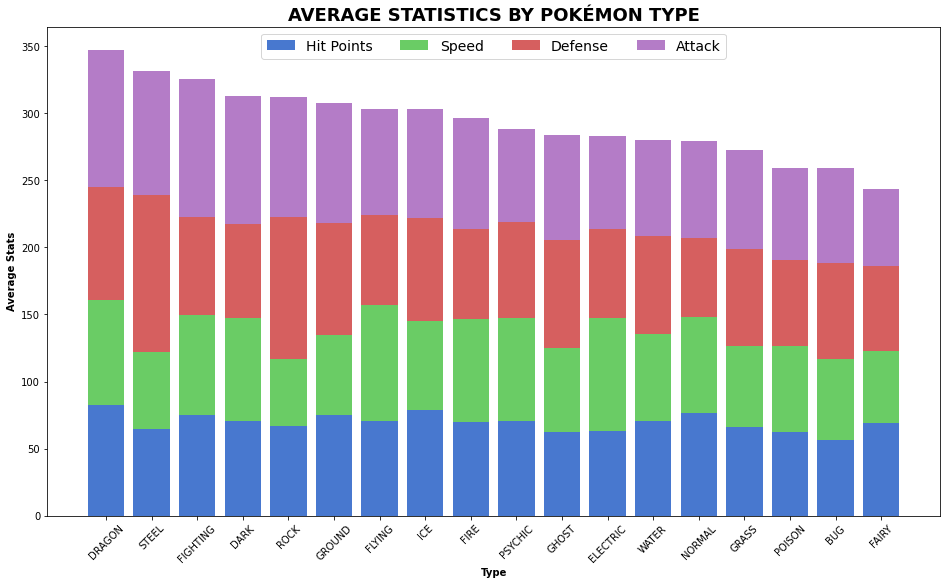

In [8]:
#Bar chart showing group average stats by Pokémon type
df_type=df.groupby("Type")[["Attack","Defense","Speed","HP"]].mean()
df_type["total_stats"]=df_type["HP"]+df_type["Attack"]+df_type["Defense"]+df_type["Speed"]
df_types=df_type.sort_values("total_stats",ascending=False)
plt.style.use("seaborn-muted")
fig,ax=plt.subplots()
ax.bar(df_types.index,df_types["HP"],label="Hit Points")
ax.bar(df_types.index,df_types["Speed"],bottom=df_types["HP"],label="Speed")
ax.bar(df_types.index,df_types["Defense"],bottom=df_types["HP"]+df_types["Speed"],label="Defense")
ax.bar(df_types.index,df_types["Attack"],bottom=df_types["HP"]+df_types["Speed"]+df_types["Defense"],label="Attack")
ax.set_xlabel("Type",fontweight="bold")
ax.set_ylabel("Average Stats",fontweight="bold")
ax.set_title("AVERAGE STATISTICS BY POKÉMON TYPE",fontsize=18,fontweight="bold")
ax.legend(fontsize=14,ncol=4,loc="upper center")
plt.xticks(rotation=45)
fig.set_size_inches([16,9])
fig.savefig('pokemon_type_stats_bar.png',transparent=True)

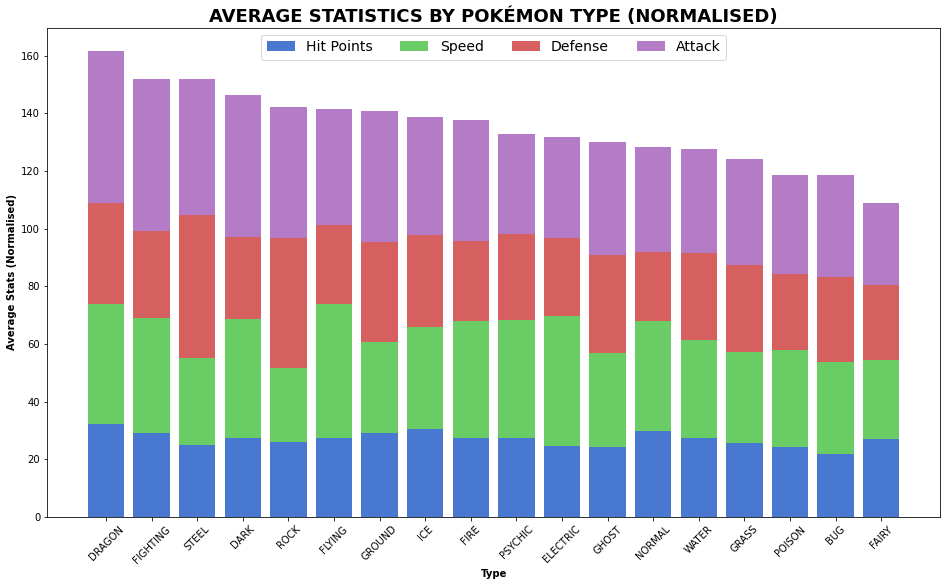

In [9]:
#Bar chart showing group average stats by type (NORMALISED)
df_type_n=df.groupby("Type")[["Atk_norm","Def_norm","Spd_norm","HP_norm"]].mean()
df_type_n["total_stats_n"]=df_type_n["HP_norm"]+df_type_n["Atk_norm"]+df_type_n["Def_norm"]+df_type_n["Spd_norm"]
df_types_n=df_type_n.sort_values("total_stats_n",ascending=False)
plt.style.use("seaborn-muted")
fig,ax=plt.subplots()
ax.bar(df_types_n.index,df_types_n["HP_norm"],label="Hit Points")
ax.bar(df_types_n.index,df_types_n["Spd_norm"],bottom=df_types_n["HP_norm"],label="Speed")
ax.bar(df_types_n.index,df_types_n["Def_norm"],bottom=df_types_n["HP_norm"]+df_types_n["Spd_norm"],label="Defense")
ax.bar(df_types_n.index,df_types_n["Atk_norm"],bottom=df_types_n["HP_norm"]+df_types_n["Spd_norm"]+df_types_n["Def_norm"],label="Attack")
ax.set_xlabel("Type",fontweight="bold")
ax.set_ylabel("Average Stats (Normalised)",fontweight="bold")
ax.set_title("AVERAGE STATISTICS BY POKÉMON TYPE (NORMALISED)",fontsize=18,fontweight="bold")
ax.legend(fontsize=14,ncol=4,loc="upper center")
plt.xticks(rotation=45)
fig.set_size_inches([16,9])
fig.savefig('pokemon_type_stats_bar(norm).png',transparent=True)

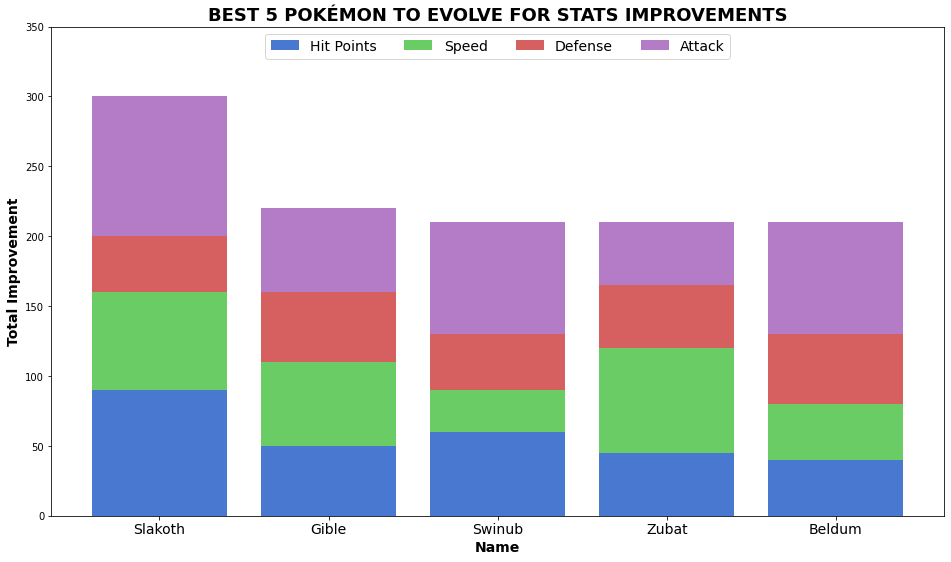

In [10]:
#Stacked bar plot - best Pokémon to evolve based on stats improvements
final_srt=final_unique.sort_values("all",ascending=False)
fsi=final_srt.set_index("Name_og")
most_imp=fsi.iloc[:5]

plt.style.use("seaborn-muted")
fig,ax=plt.subplots()
ax.bar(most_imp.index,most_imp["tot_hp"],label="Hit Points")
ax.bar(most_imp.index,most_imp["tot_spd"],bottom=most_imp["tot_hp"],label="Speed")
ax.bar(most_imp.index,most_imp["tot_def"],bottom=most_imp["tot_hp"]+most_imp["tot_spd"],label="Defense")
ax.bar(most_imp.index,most_imp["tot_atk"],bottom=most_imp["tot_hp"]+most_imp["tot_spd"]+most_imp["tot_def"],label="Attack")
plt.ylim(0,350)
plt.xlabel("Name",fontsize=14,fontweight="bold")
plt.ylabel("Total Improvement",fontsize=14,fontweight="bold")
plt.xticks(most_imp.index,fontsize=14)
ax.set_title("BEST 5 POKÉMON TO EVOLVE FOR STATS IMPROVEMENTS",fontsize=18,fontweight="bold")
ax.legend(fontsize=14,ncol=4,loc="upper center")
fig.set_size_inches([16,9])
fig.savefig('best_pokemon_evolution.png',transparent=True)


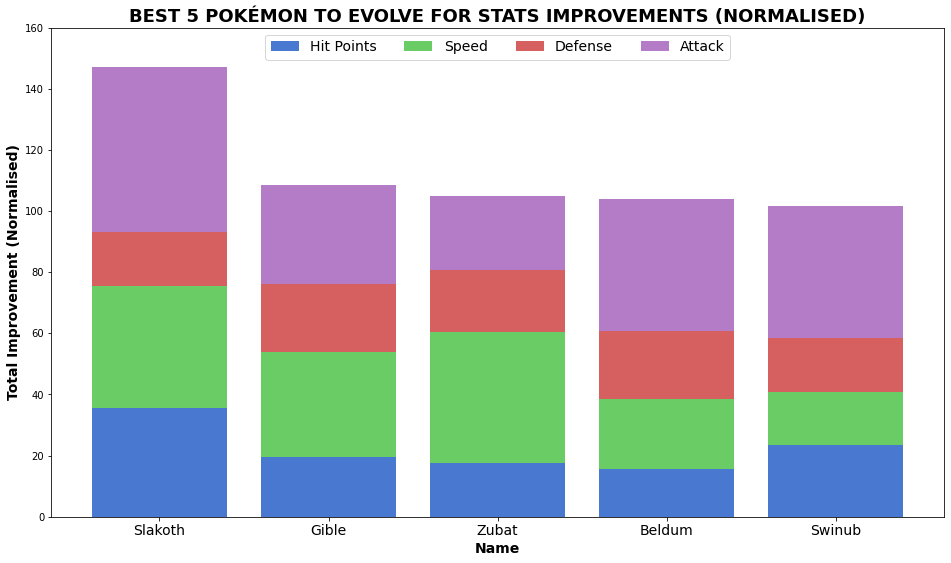

In [11]:
#Stacked bar plot - best Pokémon to evolve based on stats improvements (NORMALISED)
final_srt_n=final_unique_n.sort_values("all_n",ascending=False)
fsi_n=final_srt_n.set_index("Name_og")
most_imp_n=fsi_n.iloc[:5]

plt.style.use("seaborn-muted")
fig,ax=plt.subplots()
ax.bar(most_imp_n.index,most_imp_n["tot_norm_hp"],label="Hit Points")
ax.bar(most_imp_n.index,most_imp_n["tot_norm_spd"],bottom=most_imp_n["tot_norm_hp"],label="Speed")
ax.bar(most_imp_n.index,most_imp_n["tot_norm_def"],bottom=most_imp_n["tot_norm_hp"]+most_imp_n["tot_norm_spd"],label="Defense")
ax.bar(most_imp_n.index,most_imp_n["tot_norm_atk"],bottom=most_imp_n["tot_norm_hp"]+most_imp_n["tot_norm_spd"]+most_imp_n["tot_norm_def"],label="Attack")
plt.ylim(0,160)
plt.xlabel("Name",fontsize=14,fontweight="bold")
plt.ylabel("Total Improvement (Normalised)",fontsize=14,fontweight="bold")
plt.xticks(most_imp_n.index,fontsize=14)
ax.set_title("BEST 5 POKÉMON TO EVOLVE FOR STATS IMPROVEMENTS (NORMALISED)",fontsize=18,fontweight="bold")
ax.legend(fontsize=14,ncol=4,loc="upper center")
fig.set_size_inches([16,9])
fig.savefig('best_pokemon_evolution(norm).png',transparent=True)

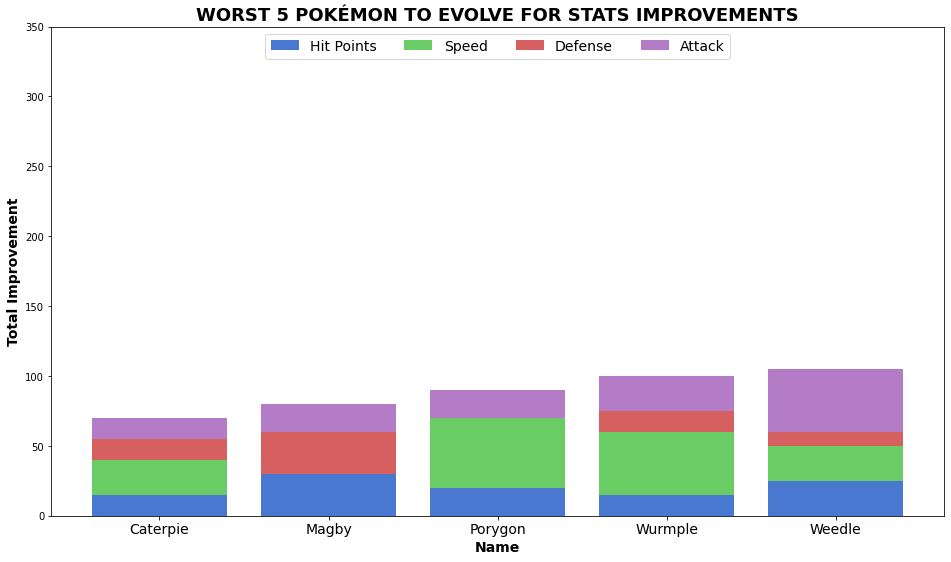

In [12]:
#Stacked bar plot - worst Pokémon to evolve based on stats improvements
final_srt_least=final_unique.sort_values("all")
fsi2=final_srt_least.set_index("Name_og")
least_imp=fsi2.iloc[:5]

plt.style.use("seaborn-muted")
fig,ax=plt.subplots()
ax.bar(least_imp.index,least_imp["tot_hp"],label="Hit Points")
ax.bar(least_imp.index,least_imp["tot_spd"],bottom=least_imp["tot_hp"],label="Speed")
ax.bar(least_imp.index,least_imp["tot_def"],bottom=least_imp["tot_hp"]+least_imp["tot_spd"],label="Defense")
ax.bar(least_imp.index,least_imp["tot_atk"],bottom=least_imp["tot_hp"]+least_imp["tot_spd"]+least_imp["tot_def"],label="Attack")
plt.ylim(0,350)
plt.xlabel("Name",fontsize=14,fontweight="bold")
plt.ylabel("Total Improvement",fontsize=14,fontweight="bold")
plt.xticks(least_imp.index,fontsize=14)
ax.set_title("WORST 5 POKÉMON TO EVOLVE FOR STATS IMPROVEMENTS",fontsize=18,fontweight="bold")
ax.legend(fontsize=14,ncol=4,loc="upper center")
fig.set_size_inches([16,9])
fig.savefig('worst_pokemon_evolution.png',transparent=True)

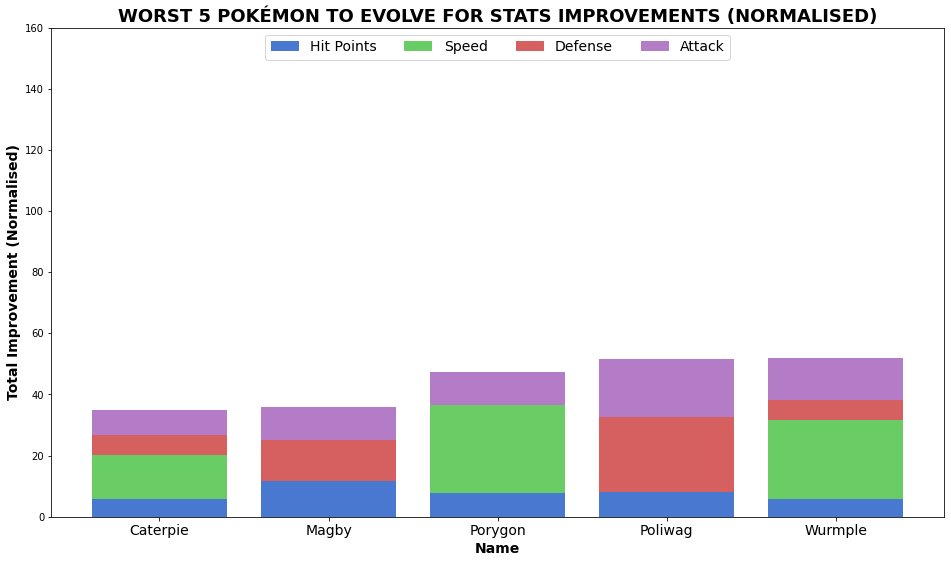

In [13]:
#Stacked bar plot - worst Pokémon to evolve based on stats improvements (NORMALISED)
final_srt_least_n=final_unique_n.sort_values("all_n")
fsi2_n=final_srt_least_n.set_index("Name_og")
least_imp_n=fsi2_n.iloc[:5]

plt.style.use("seaborn-muted")
fig,ax=plt.subplots()
ax.bar(least_imp_n.index,least_imp_n["tot_norm_hp"],label="Hit Points")
ax.bar(least_imp_n.index,least_imp_n["tot_norm_spd"],bottom=least_imp_n["tot_norm_hp"],label="Speed")
ax.bar(least_imp_n.index,least_imp_n["tot_norm_def"],bottom=least_imp_n["tot_norm_hp"]+least_imp_n["tot_norm_spd"],label="Defense")
ax.bar(least_imp_n.index,least_imp_n["tot_norm_atk"],bottom=least_imp_n["tot_norm_hp"]+least_imp_n["tot_norm_spd"]+least_imp_n["tot_norm_def"],label="Attack")
plt.ylim(0,160)
plt.xlabel("Name",fontsize=14,fontweight="bold")
plt.ylabel("Total Improvement (Normalised)",fontsize=14,fontweight="bold")
plt.xticks(least_imp_n.index,fontsize=14)
ax.set_title("WORST 5 POKÉMON TO EVOLVE FOR STATS IMPROVEMENTS (NORMALISED)",fontsize=18,fontweight="bold")
ax.legend(fontsize=14,ncol=4,loc="upper center")
fig.set_size_inches([16,9])
fig.savefig('worst_pokemon_evolution(norm).png',transparent=True)

In [14]:
#Creating total_stats column
df["total_stats"]=df["HP"]+df["Attack"]+df["Defense"]+df["Speed"]
#Sorting and dropping duplicates for worst 5 bar plot
df_sorted_worst=df.sort_values("total_stats")
worst_unique=df_sorted_worst.drop_duplicates(subset="Name",keep="first",inplace=False)
#Sorting and dropping duplicates for top 5 bar plot
df_sorted_ts=df.sort_values("total_stats",ascending=False)
unique_names=df_sorted_ts.drop_duplicates(subset="Name",keep="first",inplace=False)

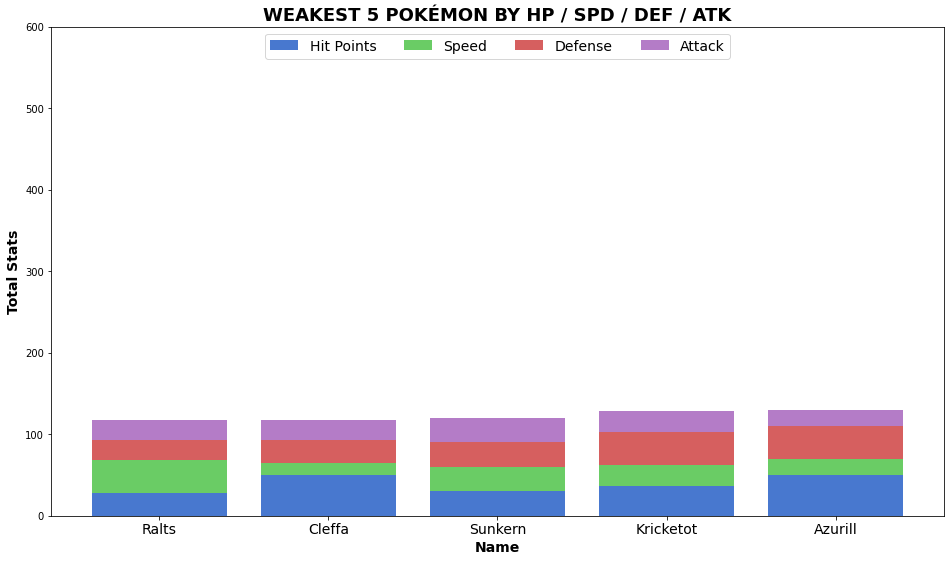

In [15]:
#Stacked bar plot - worst 5 Pokémon based on their stats
bot5_unique=worst_unique.iloc[:5]
bot5=bot5_unique.set_index("Name")
plt.style.use("seaborn-muted")
fig,ax=plt.subplots()
ax.bar(bot5.index,bot5["HP"],label="Hit Points")
ax.bar(bot5.index,bot5["Speed"],bottom=bot5["HP"],label="Speed")
ax.bar(bot5.index,bot5["Defense"],bottom=bot5["HP"]+bot5["Speed"],label="Defense")
ax.bar(bot5.index,bot5["Attack"],bottom=bot5["HP"]+bot5["Speed"]+bot5["Defense"],label="Attack")
plt.ylim(0,600)
plt.xlabel("Name", fontsize=14, fontweight="bold")
plt.ylabel("Total Stats",fontsize=14,fontweight="bold")
plt.xticks(bot5.index,fontsize=14)
ax.set_title("WEAKEST 5 POKÉMON BY HP / SPD / DEF / ATK",fontsize=18,fontweight="bold")
ax.legend(fontsize=14,ncol=4,loc="upper center")
fig.set_size_inches([16,9])
fig.savefig('weakest_pokemon.png',transparent=True)

In [16]:
#Creating total_stats column (NORMALISED)
df["total_stats_norm"]=df["HP_norm"]+df["Atk_norm"]+df["Def_norm"]+df["Spd_norm"]
#Sorting and dropping duplicates for worst 5 bar plot
dfn_sorted_worst=df.sort_values("total_stats_norm")
worst_unique_n=dfn_sorted_worst.drop_duplicates(subset="Name",keep="first",inplace=False)
#Sorting and dropping duplicates for top 5 bar plot
dfn_sorted_ts=df.sort_values("total_stats_norm",ascending=False)
unique_names_n=dfn_sorted_ts.drop_duplicates(subset="Name",keep="first",inplace=False)

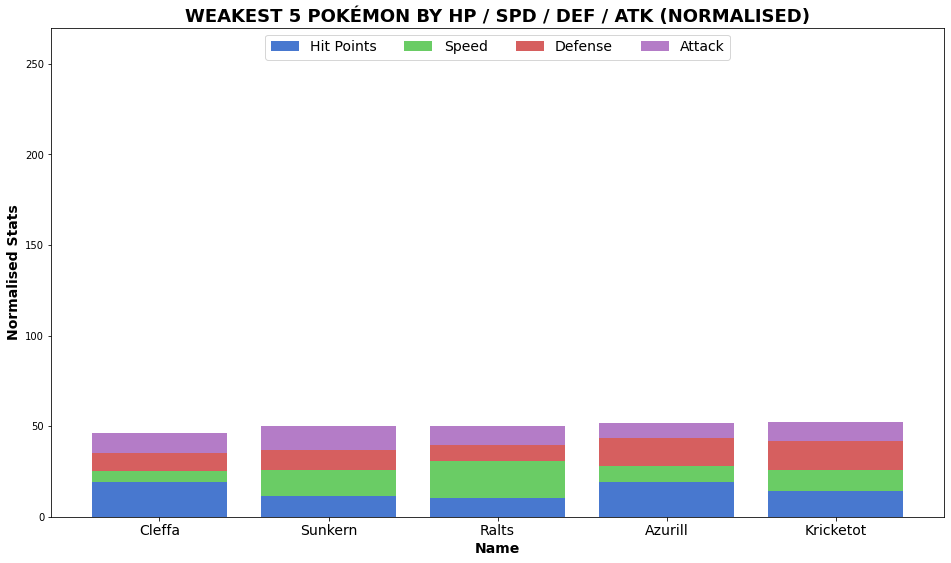

In [17]:
#Stacked bar plot - worst 5 Pokémon based on their stats (NORMALISED)
bot5_unique_n=worst_unique_n.iloc[:5]
bot5_n=bot5_unique_n.set_index("Name")
plt.style.use("seaborn-muted")
fig,ax=plt.subplots()
ax.bar(bot5_n.index,bot5_n["HP_norm"],label="Hit Points")
ax.bar(bot5_n.index,bot5_n["Spd_norm"],bottom=bot5_n["HP_norm"],label="Speed")
ax.bar(bot5_n.index,bot5_n["Def_norm"],bottom=bot5_n["HP_norm"]+bot5_n["Spd_norm"],label="Defense")
ax.bar(bot5_n.index,bot5_n["Atk_norm"],bottom=bot5_n["HP_norm"]+bot5_n["Spd_norm"]+bot5_n["Def_norm"],label="Attack")
plt.ylim(0,270)
plt.xlabel("Name", fontsize=14, fontweight="bold")
plt.ylabel("Normalised Stats",fontsize=14,fontweight="bold")
plt.xticks(bot5_n.index,fontsize=14)
ax.set_title("WEAKEST 5 POKÉMON BY HP / SPD / DEF / ATK (NORMALISED)",fontsize=18,fontweight="bold")
ax.legend(fontsize=14,ncol=4,loc="upper center")
fig.set_size_inches([16,9])
fig.savefig('weakest_pokemon(norm).png',transparent=True)

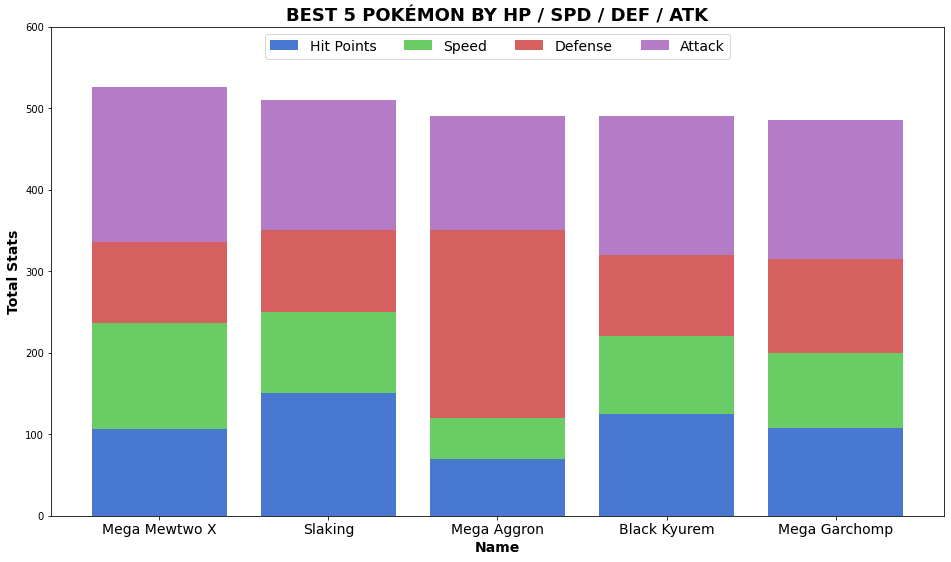

In [18]:
#Stacked bar plot - Best 5 best Pokémon based on their stats
top5_unique=unique_names.iloc[:5]
top5=top5_unique.set_index("Name")
plt.style.use("seaborn-muted")
fig,ax=plt.subplots()
ax.bar(top5.index,top5["HP"],label="Hit Points")
ax.bar(top5.index,top5["Speed"],bottom=top5["HP"],label="Speed")
ax.bar(top5.index,top5["Defense"],bottom=top5["HP"]+top5["Speed"],label="Defense")
ax.bar(top5.index,top5["Attack"],bottom=top5["HP"]+top5["Speed"]+top5["Defense"],label="Attack")
plt.ylim(0,600)
plt.xlabel("Name",fontsize=14,fontweight="bold")
plt.ylabel("Total Stats",fontsize=14,fontweight="bold")
plt.xticks(top5.index,fontsize=14)
ax.set_title("BEST 5 POKÉMON BY HP / SPD / DEF / ATK",fontsize=18,fontweight="bold")
ax.legend(fontsize=14,ncol=4,loc="upper center")
fig.set_size_inches([16,9])
fig.savefig('strongest_pokemon.png',transparent=True)

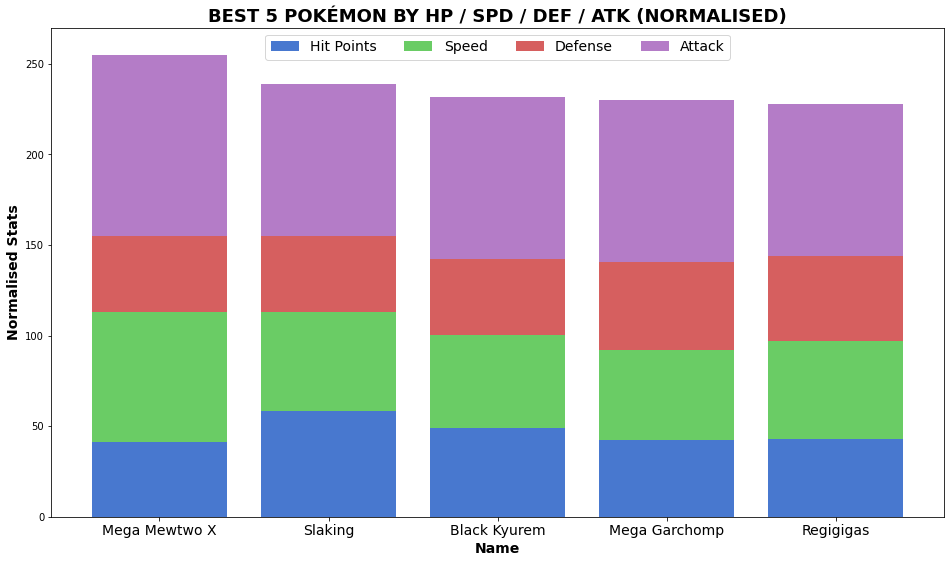

In [19]:
#Stacked bar plot - Best 5 best Pokémon based on their stats (NORMALISED)
top5_unique_n=unique_names_n.iloc[:5]
top5_n=top5_unique_n.set_index("Name")
plt.style.use("seaborn-muted")
fig,ax=plt.subplots()
ax.bar(top5_n.index,top5_n["HP_norm"],label="Hit Points")
ax.bar(top5_n.index,top5_n["Spd_norm"],bottom=top5_n["HP_norm"],label="Speed")
ax.bar(top5_n.index,top5_n["Def_norm"],bottom=top5_n["HP_norm"]+top5_n["Spd_norm"],label="Defense")
ax.bar(top5_n.index,top5_n["Atk_norm"],bottom=top5_n["HP_norm"]+top5_n["Spd_norm"]+top5_n["Def_norm"],label="Attack")
plt.ylim(0,270)
plt.xlabel("Name",fontsize=14,fontweight="bold")
plt.ylabel("Normalised Stats",fontsize=14,fontweight="bold")
plt.xticks(top5_n.index,fontsize=14)
ax.set_title("BEST 5 POKÉMON BY HP / SPD / DEF / ATK (NORMALISED)",fontsize=18,fontweight="bold")
ax.legend(fontsize=14,ncol=4,loc="upper center")
fig.set_size_inches([16,9])
fig.savefig('strongest_pokemon(norm).png',transparent=True)

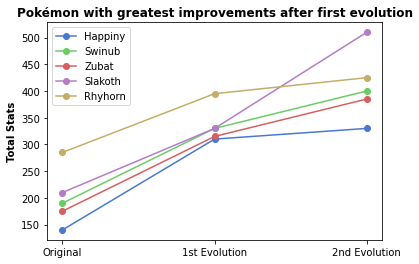

In [20]:
#Sorting and subsetting for 5 Pokémon with largest improvements after first evolution
final_1evo_srt=final_unique.sort_values("1_all",ascending=False)
f_index=final_1evo_srt.set_index("Name_og")
most_1st=f_index.iloc[:5]
most_1st_evo=most_1st.reset_index()

#Line chart showing improvements for 5 Pokémon with greatest overall improvement after first evolution
x=np.array([0,1,2])
y=[most_1st_evo["total_stats_og"],most_1st_evo["total_stats_evolved"],most_1st_evo["total_stats_final"]]
my_xticks = ['Original','1st Evolution','2nd Evolution']
plt.xticks(x, my_xticks)
plt.plot(x, y,marker='o')
plt.title("Pokémon with greatest improvements after first evolution",fontweight="bold")
plt.ylabel("Total Stats",fontweight="bold")
plt.legend(most_1st_evo["Name_og"])
plt.savefig('1st_evol_best_pokemon.png',transparent=True)
plt.show()

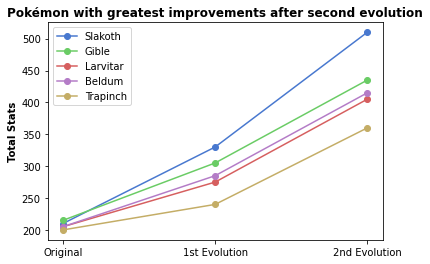

In [21]:
#Sorting and subsetting for 5 Pokémon with largest improvements after second evolution
final_2evo_srt=final_unique.sort_values("2_all",ascending=False)
f2_index=final_2evo_srt.set_index("Name_og")
most_2nd=f2_index.iloc[:5]
most_2nd_evo=most_2nd.reset_index()

#Line chart showing improvements for 5 Pokémon with greatest overall improvement after second evolution
x=np.array([0,1,2])
y=[most_2nd_evo["total_stats_og"],most_2nd_evo["total_stats_evolved"],most_2nd_evo["total_stats_final"]]
my_xticks = ['Original','1st Evolution','2nd Evolution']
plt.xticks(x, my_xticks)
plt.plot(x, y,marker='o')
plt.title("Pokémon with greatest improvements after second evolution",fontweight="bold")
plt.ylabel("Total Stats",fontweight="bold")
plt.legend(most_2nd_evo["Name_og"])
plt.savefig('2nd_evol_best_pokemon.png',transparent=True)
plt.show()

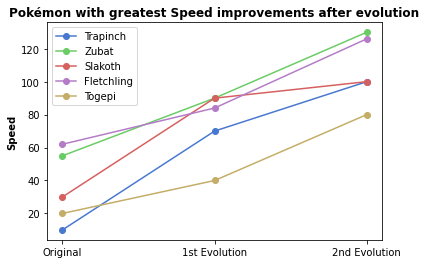

In [22]:
#Sorting and subsetting for 5 Pokémon with largest improvements in Speed after evolutions
final_spd_srt=final_unique.sort_values("tot_spd",ascending=False)
spd_index=final_spd_srt.set_index("Name_og")
most_imp_spd=spd_index.iloc[:5]
most_spd=most_imp_spd.reset_index()

#Line chart showing speed improvements for 5 Pokémon with greatest improvement in speed
x=np.array([0,1,2])
y=[most_spd["Speed_og"],most_spd["Speed_evolved"],most_spd["Speed_final"]]
my_xticks = ['Original','1st Evolution','2nd Evolution']
plt.xticks(x, my_xticks)
plt.plot(x, y,marker='o')
plt.title("Pokémon with greatest Speed improvements after evolution",fontweight="bold")
plt.ylabel("Speed",fontweight="bold")
plt.legend(most_spd["Name_og"])
plt.savefig('spd_evolution_pokemon.png',transparent=True)
plt.show()

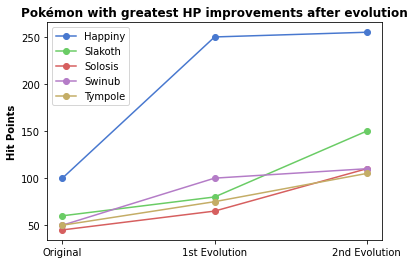

In [23]:
#Sorting and subsetting for 5 Pokémon with largest improvements in Hit Points after evolutions
final_hp_srt=final_unique.sort_values("tot_hp",ascending=False)
hp_index=final_hp_srt.set_index("Name_og")
most_imp_hp=hp_index.iloc[:5]
most_hp=most_imp_hp.reset_index()

#Line chart showing HP improvements for 5 Pokémon with greatest improvement in HP
x=np.array([0,1,2])
y=[most_hp["HP_og"],most_hp["HP_evolved"],most_hp["HP_final"]]
my_xticks = ['Original','1st Evolution','2nd Evolution']
plt.xticks(x, my_xticks)
plt.plot(x, y,marker='o')
plt.title("Pokémon with greatest HP improvements after evolution",fontweight="bold")
plt.ylabel("Hit Points",fontweight="bold")
plt.legend(most_hp["Name_og"])
plt.savefig('hp_evolution_pokemon.png',transparent=True)
plt.show()

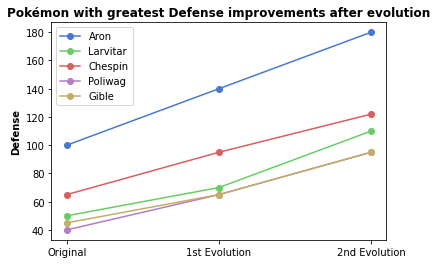

In [24]:
#Sorting and subsetting for 5 Pokémon with largest improvements in Defense after evolutions
final_def_srt=final_unique.sort_values("tot_def",ascending=False)
def_index=final_def_srt.set_index("Name_og")
most_imp_def=def_index.iloc[:5]
most_def=most_imp_def.reset_index()

#Line chart showing Defense improvements for 5 Pokémon with greatest improvement in Defense
x=np.array([0,1,2])
y=[most_def["Defense_og"],most_def["Defense_evolved"],most_def["Defense_final"]]
my_xticks = ['Original','1st Evolution','2nd Evolution']
plt.xticks(x, my_xticks)
plt.plot(x, y,marker='o')
plt.title("Pokémon with greatest Defense improvements after evolution",fontweight="bold")
plt.ylabel("Defense",fontweight="bold")
plt.legend(most_def["Name_og"])
plt.savefig('def_evolution_pokemon.png',transparent=True)
plt.show()


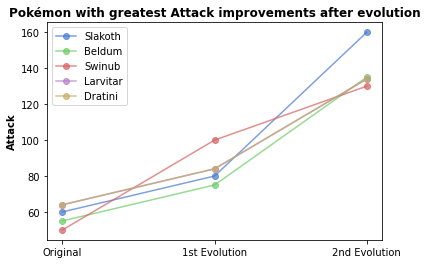

In [25]:
#Sorting and subsetting for 5 Pokémon with largest improvements in Attack after evolutions
final_atk_srt=final_unique.sort_values("tot_atk",ascending=False)
atk_index=final_atk_srt.set_index("Name_og")
most_imp_atk=atk_index.iloc[:5]
most_atk=most_imp_atk.reset_index()

#Line chart showing Attack improvements for 5 Pokémon with greatest improvement in Attack
x=np.array([0,1,2])
y=[most_atk["Attack_og"],most_atk["Attack_evolved"],most_atk["Attack_final"]]
my_xticks = ['Original','1st Evolution','2nd Evolution']
plt.xticks(x, my_xticks)
plt.plot(x, y,marker='o',alpha=0.7)
plt.title("Pokémon with greatest Attack improvements after evolution",fontweight="bold")
plt.ylabel("Attack",fontweight="bold")
plt.legend(most_atk["Name_og"])
plt.savefig('atk_evolution_pokemon.png',transparent=True)
plt.show()

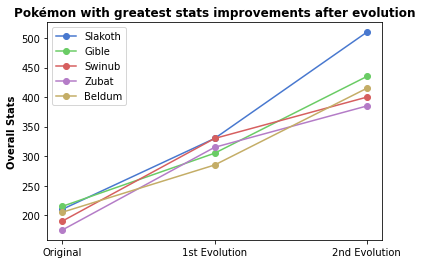

In [26]:
#Sorting and subsetting for 5 Pokémon with largest improvements total stats after evolutions
final_all_srt=final_unique.sort_values("all",ascending=False)
all_index=final_all_srt.set_index("Name_og")
most_imp_all=all_index.iloc[:5]
most_all=most_imp_all.reset_index()

##Line chart showing overall improvements for 5 Pokémon with greatest stats improvements
x=np.array([0,1,2])
y=[most_all["total_stats_og"],most_all["total_stats_evolved"],most_all["total_stats_final"]]
my_xticks = ['Original','1st Evolution','2nd Evolution']
plt.xticks(x, my_xticks)
plt.plot(x, y,marker='o')
plt.title("Pokémon with greatest stats improvements after evolution",fontweight="bold")
plt.ylabel("Overall Stats",fontweight="bold")
plt.legend(most_all["Name_og"])
plt.savefig('overall_evolution_pokemon.png',transparent=True)
plt.show()
